## Training the model

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Splitting the data into the training and the testing data

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Normalizing the data to be between [0,1]

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Creating the model itself
And adding layers into the model

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #this flattens the 28x28 grid into one line
#this adds the neurons
model.add(tf.keras.layers.Dense(128, activation='relu')) #rectify linear unit
model.add(tf.keras.layers.Dense(128, activation='relu'))
#add end nuerons makes sure all the outputs add up to 1 something like a confidence value
model.add(tf.keras.layers.Dense(10, activation='softmax')) 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the model

In [30]:
model.fit(x_train,y_train,epochs=5)
model.save('handwritten.keras')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.9987 - loss: 0.0040
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.9994 - loss: 0.0023
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - accuracy: 0.9993 - loss: 0.0026
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - accuracy: 0.9995 - loss: 0.0016
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.9987 - loss: 0.0056


## Loading and Running Model

In [31]:
model = tf.keras.models.load_model('handwritten.keras')
loss, accuracy = model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.9758 - loss: 0.2878
0.2540016174316406
0.9776999950408936


Using my own data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This digit is probably a 3


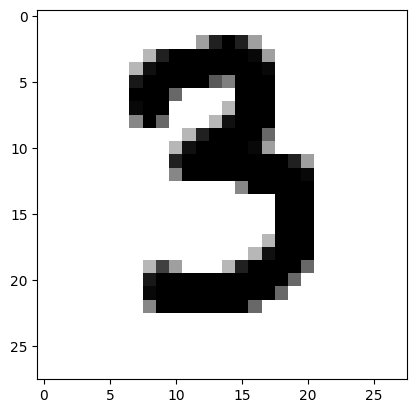

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
This digit is probably a 7


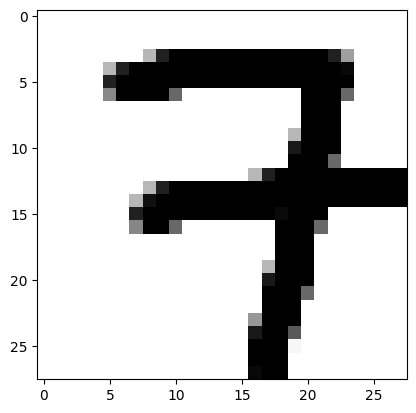

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
This digit is probably a 8


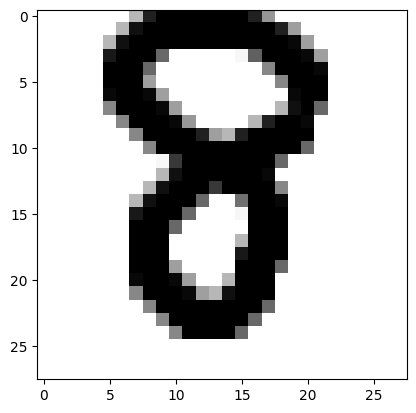

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
This digit is probably a 1


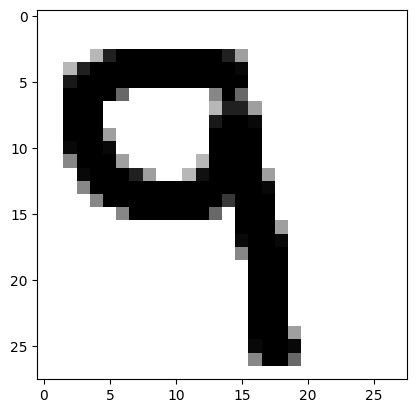

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
This digit is probably a 2


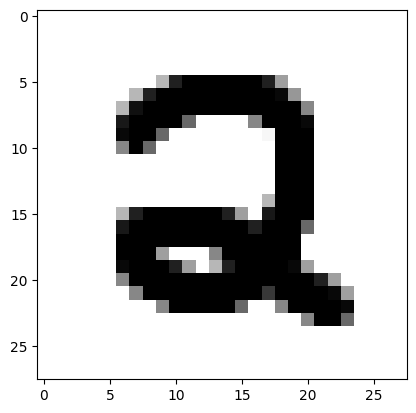

In [32]:
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is probably a {np.argmax(prediction)}")
        #argmax gives which neuron with highest activation
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error!")
    finally:
        image_number+=1
        
        